
# Chambolle-Pock-Bregman

This document is devoted to the resolution of discrete mean field games via Chambolle-Pock-Bregman algorithm (see {cite}`chambolle2016ergodic`). We investigate proximity operators beased on the **Kullback-Leibler divergence** to compute running cost step.

We define $\mathcal{T} = \{0,\ldots,T-1\}$, $\bar{\mathcal{T}} = \{0,\ldots,T\}$ and $S=\{0,\ldots,n\}$. We set $\Delta_t = 1/T$ and $\Delta_x = 1/n$.
Let $\xi$ be a 1-strongly convex function. For any $m_1,m_2 \in \mathbb{R}(S)$ we define the Bregman divergence 

$$ D(m_1,m_2) = \xi(m_1) - \xi(m_2) - \langle \nabla \xi (m_2),m_1- m_2 \rangle_{m}. $$ 

We define the associated generalized proximity operator 

$$ \text{prox}^D_g(m_1) = \text{argmin}_{m_2} D(m_1,m_2) + g(m_2).$$

Note that if $D(m_1,m_2) = \|m_1-m_2\|_m^2$ then we are in the classical proximal case. For any $m_1, m_2 \in \Delta(S)/\Delta_x$, we define the **Kullback-Leibler divergence**

$$ D_{KL}(m_1,m_2) = h(m_1) - h(m_2) -  \langle \nabla h (m_2),m_1-m_2 \rangle, \qquad h(m) = \sum_{x \in S}m(x) \ln(m(x)).$$

which is equivalent to

$$ D_{KL}(m_1,m_2) = \sum_{x \in S} m_1(x) (\ln(m_1(x)/m_2(x)) - 1).$$

**Strong convexity**

For any $\Delta_x m_1, \Delta_x m_2 \in \Delta(S)$, 

$$ \begin{align}  \langle \nabla h ( \Delta_x m_1) -  \nabla h ( \Delta_x m_2) ,\Delta_x m_1-\Delta_x m_2 \rangle & = \Delta_x  \sum_{x \in S} \ln(m_1(x)/m_2(x))(m_1(x)-m_2(x)) \\
& \geq \Delta_x \|m_1-m_2\|_2^2
\end{align}$$

thus we deduce that $ \sum_{t \in \mathcal{T}}\Delta_t h[\cdot](t) + h[\cdot](T)$ is 1-strongly convex with respect to $\|\cdot\|_m.$

## Packages

In [105]:
import numpy as np
from numpy import random
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

## Algorithms
The Bregman-Chambolle-Pock algorithm is a primal-dual method which aims at finding a saddle-point in optimization problems of the following form:

$$ \min_{x \in X} \max_{y \in Y} \langle K x, y \rangle + f(x) + g(x) - h^\star(y)$$

for any $K$ bounded operator, $F$ and $G$ l.s.c. convex and proper functions, $H$ with Lipschitz gradient.

__Non-linear primal dual algorithm__

Let $D_x$ and $D_y$ two distances, the algorithm is given by 

* find 

$$ y^{n+1} = \text{arg min}_{y} \, h^\star(y) - \langle K \bar{x}^{n}, y \rangle + \frac{1}{\sigma} D_y(y,y^n)$$


* find

$$x^{n+1} = \text{arg min}_{x}\, f(x^n) + \langle \nabla f(x^n), x-x^n \rangle + g(x) + \langle x, K^{\star} y^{n+1} \rangle + \frac{1}{\tau} D_x(x,x^n)$$

* update

$$\bar{x}^{n+1} = x^{n+1} + (x^{n+1}-x^{n})$$


```{admonition} Remark

If $D_x$ and $D_y$ are euclidean norms then $x^{n+1}$ and $y^{n+1}$ can be written:

$$x^{n+1} = \text{prox}_{\tau g}(x^n - \nabla f(x^n) - K^\star y^{n+1})$$

* update

$$\bar{x}^{n+1} = x^{n+1} + (x^{n+1}-x^{n})$$

* find 

$$ y^{n+1} = \text{prox}_{\sigma h}(y^n  + \sigma K \bar{x}^{n+1})$$
```


We define 

$$ D_{KL}((m_1,m_2,w,D),(m^n_1,m^n_2,w^n,D^n)) = D_{KL}(m_1(T),m_1^n(T)) + \sum_{t \in \mathcal{T}}D_{KL}(m_1(t),m_1^n(t))\Delta_t + D_{KL}(w(t),w^n(t))\Delta_t + \frac{1}{2}\|(m_2,D) - (m_2^n,D^n)\|_{m,D}^2.$$

In our case, we have the following saddle point problem:

$$\min_{(m_1,m_2,w,D) \in \mathcal{C}} \max_{(P,u,\gamma) \in \mathcal{K}} \langle \mathcal{A}(m_1,m_2,w,D),(P,u,\gamma) \rangle  + \mathcal{F}(m_1,m_2,w,D) - \mathcal{G}^\circ(P,u,\gamma),$$

where 

$$ \begin{align}\mathcal{F}(m_1,m_2,w,D) &= \mathcal{F}_1(m_1,w) + \mathcal{F}_2(m_2,D),\\[1em]
\mathcal{F}_1(m_1,w) &= \sum_{(t,x) \in \mathcal{T} \times S} \ell[m_1,w](t,x) \Delta_t\Delta_x, \\[1em]
\mathcal{F}_2(m_2,D) &= \sum_{t \in \mathcal{T}} \phi[D](t)\Delta_t + F[m_2](t)\Delta_t \Delta_x + F[m_2](T)\Delta_x.
\end{align}$$

Notice that depending on the assumptions on $F$ and $\phi$, one could identify $\mathcal{F}_2$ either with $f$ or $g$ in the **abstract algorithm above**.

The algorithm is given by:

* find 

$$(P^{n+1},u^{n+1},\gamma^{n+1}) = \text{prox}_{\sigma \mathcal{G}^\circ}((P^n,u^n,\gamma^n) 
+ \sigma \mathcal{A}(\bar{m}_1^{n},\bar{m}_2^{n},\bar{w}^n))$$

* find 

$$(m_1^{n+1},m_2^{n+1},w^{n+1},D^{n+1}) =  \text{arg min}_{(m_1,m_2,w,D) \in \mathcal{C}} \mathcal{F}(m_1,m_2,w,D) + \langle (m_1,m_2,w,D), \mathcal{A}^{\circ} (P^{n+1},u^{n+1},\gamma^{n+1}) \rangle + \frac{1}{\tau} D_{KL}((m_1,m_2,w,D),(m^n_1,m^n_2,w^n,D^n))$$

* update 

$$(\bar{m}_1^{n+1},\bar{m}_2^{n+1},\bar{w}^{n+1},\bar{D}^{n+1}) = (m_1^{n+1},m_2^{n+1},w^{n+1},D^{n+1}) + \theta((m_1^{n+1},m_2^{n+1},w^{n+1},D^{n+1}) - (m_1^{n},m_2^{n},w^{n},D^{n})) $$

## Data of the problem

In [106]:
def initial_mass(n):
    m_bar = np.zeros(n)
    for x in range(n):
        m_bar[x] = np.exp(-(x-n/2)**2/(n/4)**2)
    return(n*m_bar/np.sum(m_bar))


def displacement_cost(T,n):
    dx=1/n
    dt=1/T
    disp = np.zeros((T-1,n,n))
    for t in range(T-1):
        for x in range(n):
            for y in range(n):
                disp[t,x,y] = ((y-x)*dx/dt)**2/4
    return(disp)

def penalisation_congestion(T,n):
    nu = np.zeros((T,n)) 
    for t in range(T):
        if t > T/2 and t < 3*T/4:
            for x in range(n):
                if x > n/2:
                    nu[t,x] = 10
    return(nu)

def sharp_penalisation_congestion(T,n):
    eta = np.zeros((T,n)) + 3
    for t in range(T):
        for x in range(n):
            if (t > T/3 and t < 2*T/3) and (x > n/3 and x < 2*n/3):
                    eta[t,x] = 1/4
    return(eta)

def reference_demand(T):
    new_D_bar = np.zeros(T-1)
    for t in range(T-1):
        new_D_bar[t] = np.sin(t*(4*np.pi)/(T-1))
    return(new_D_bar)

def alpha_cost(T,n):
    dx=1/n
    dt=1/T
    disp = np.zeros((T-1,n,n))
    for t in range(T-1):
        for x in range(n):
            for y in range(n):
                disp[t,x,y] = (y-x)*dx/dt
    return(disp)

## Computation of Chambolle-Pock steps

__Computation of__ $(P^{n+1},u^{n+1},\gamma^{n+1})$

* For any $(k_1,k_2,k_3) \in \mathcal{K}$ we have that

$$ \begin{align} \text{prox}_{\sigma \mathcal{G}^\circ}(k_1,k_2,k_3) & = \text{arg min}_{(P,u,\gamma) \in \mathcal{K}} \,\frac{1}{2} \|(P,u,\gamma) - (k_1,k_2,k_3)\|^2_{P,u,\gamma} - \sigma\langle u(0,\cdot),m_0(\cdot)\rangle, \\
& = (k_1, k_2 + \sigma m_0,k_3). \end{align}$$

* Then we have that

$$ \begin{align}P^{n+1} & = P^n + \sigma (A \bar{w}^{n} \Delta_x-\bar{D}^n)\\
u^{n+1} & = u^{n} + \sigma(S\bar{w}^{n}/\Delta_t - (I_0 + I/\Delta_t + I_T/\Delta_t)\bar{m}_1^{n} + \bar{m}_0) \\
\gamma^{n+1}(t) & = \gamma^{n}(t) + \sigma( \bar{m}_1^{n}(t)-\bar{m}_2^{n}(t)).
\end{align}$$

In [107]:
def prox_P(P,D,w,T,n,sigma,alpha):
    dx=1/n
    return(P + sigma*(np.sum(alpha*w*dx)-D))

__Computation of__ $u^{n+1}$

In [108]:
def prox_u(u,m_1,w,m_0,sigma,T,n):
    dt=1/T
    new_u = np.zeros((T,n))
    for t in range(T):
        if t==0:
            new_u[t] = u[t] + sigma*(m_0-m_1[t])
        else:
            for x in range(n):
                new_u[t,x] = u[t,x] + sigma*(np.sum(w[t-1,:,x]) - m_1[t,x])/dt
    return new_u

__Computation of__ $\gamma^{n+1}$

In [109]:
def prox_gamma(gamma,m_1,m_2,sigma):
    return(gamma + sigma*(m_1-m_2))

__Computation of__ $(m_1^{n+1},m_2^{n+1},w^{n+1},D^{n+1})$


We recall that

$$(m_1^{n+1},m_2^{n+1},w^{n+1},D^{n+1}) =  \text{arg min}_{(m_1,m_2,w,D) \in \mathcal{C}} \;\mathcal{F}_1(m_1,w) + \mathcal{F}_2(m_2,D) + \langle (m_1,m_2,w,D), \mathcal{A}^{\star} (P^{n+1},u^{n+1},\gamma^{n+1}) \rangle_{m,m,w,D} + \frac{1}{\tau}D_{KL}((m_1,m_2,w,D),(m^n_1,m^n_2,w^n,D^n)).$$

Then we have 

* $(m_1^{n+1},w^{n+1})$ is given by


$$(m_1^{n+1},w^{n+1})  = \text{arg min}_{(m_1,w)} \mathcal{F}_1(m_1,w) + \langle m_1, (-I_{0}/\Delta_t -I/\Delta_t - I_T) u + \gamma \rangle_{m} + \langle w , A^\star P + S^\star/ \Delta_t u \rangle_{w} +  \frac{1}{\tau}(D_{KL}(m_1(T),m_1^n(T)) + \sum_{t \in \mathcal{T}}D_{KL}(m_1(t),m_1^n(t))\Delta_t + D_{KL}(w(t),w^n(t))\Delta_t).$$

* $m_2^{n+1}$ is given by

$$ m_2^{n+1}  = \text{prox}_{\tau F}(m_2^n + \tau\gamma^{n+1}).$$

* $D^{n+1}$ is given by

$$ D^{n+1}  = \text{prox}_{\tau \phi}(D^n + \tau P^{n+1}).$$

__Computation of__ $D^{n+1}$

We have that

$$\begin{equation}
\text{prox}_{\xi \phi}(k_1) = \begin{cases} D_{max} & \text{ if }  \frac{k_1 - \tau D_0 \bar{D}}{1 + \tau D_0} > D_{max} \\
 D_{min} & \text{ if }  \frac{k_1 - \tau D_0 \bar{D}}{1 + \tau D_0} < D_{min} \\
 \frac{k_1 - \tau D_0 \bar{D}}{1 + \tau D_0} & \text{otherwise}
\end{cases} \end{equation}$$

In [110]:
def prox_phi_star_quad(X,Db,D_0,tau,T,n,D_min,D_max):
    argmin = (X - tau*D_0*Db)/(1 + tau*D_0)
    if argmin > D_max:
        argmin = D_max
    if argmin < D_min:
        argmin = D_min
    return(argmin)

def Local_D_prox_quad(D,P,T,n,tau,Db,D_0,D_min,D_max):
    c= D + tau*P
    new_Dt = prox_phi_star_quad(c,Db,D_0,tau,T,n,D_min,D_max)
    return(new_Dt)

def D_prox_quad(D,P,T,n,tau,alpha,Db,D_0,D_min,D_max):
    new_D = np.zeros(T-1)
    for t in range(T-1):
        new_D[t] = Local_D_prox_quad(D[t],P[t],T,n,tau,Db[t],D_0,D_min,D_max)
    return new_D

__Computation of__ $m_2^{n+1}$

In [111]:
def prox_coeff_F_sharp(X,nu,eta,coeff,T,n):
    argmin = (X - coeff*nu)/(coeff + 1)
    if argmin>eta:
        argmin = eta
    if argmin<0:
        argmin = 0
    return(argmin)

def m_2_prox(m_2,gamma,nu,eta,tau,T,n):
    m_2_new = np.zeros((T,n))
    c_2 = 0
    for t in range(T):
        for x in range(n):
            c_2 = m_2[t,x] + tau*gamma[t,x]
            m_2_new[t,x] = prox_coeff_F_sharp(c_2,nu[t,x],eta[t,x],tau,T,n)
    return(m_2_new)

__Computation of__ $(m_1^{n+1},w^{n+1})$

For any $t \in \mathcal{T}$, we have that

$$ \begin{align} (m_1^{n+1},w^{n+1}) & = \text{arg min}_{(m,w)} \sum_{(t,x) \in \mathcal{T} \times S}\tilde{\ell}[m,w](t,x)\Delta_t\Delta_x + \langle m, (-I_{0}/\Delta_t -I/\Delta_t - I_T) u + \gamma \rangle_m + \langle w , A^\star P + S^\star/ \Delta_t u \rangle_{w} + \frac{1}{\tau} D_{KL}((m_1,m_2,w,D),(m_1^n,m_2^n,w^n,D^n)) \\
& = \text{arg min}_{(m,w)} \sum_{(t,x) \in \mathcal{T} \times S} \tilde{\ell}[m,w](t,x) + \langle m, (-I_{0}/\Delta_t -I/\Delta_t - I_T) u + \gamma \rangle   + \langle w , A^\star P + S^\star/ \Delta_t u \rangle  +  \frac{1}{\tau \Delta_x}(D_{KL}(m_1(T),m_1^n(T)) + \sum_{t\in \mathcal{T}} D_{KL}(m_1(t),m_1^n(t)) + D_{KL}(w(t),w^n(t)))\\
& = \text{arg min}_{(m,w)} \sum_{t \in \mathcal{T}} \sum_{(x,y) \in S\times S}w(t,x,y)\left(c_3(t,x,y) + \left( \ln(w(t,x,y)/w^n(t,x,y)) -1 \right) \right) + \sum_{x \in S} m(t,x)\left(c_1(t,x) + \left( \ln(m(t,x)/m_1^n(t,x)) -1 \right)\right)  + \chi \left(m(t,x) - \sum_{y \in S}w(t,x,y) \right)  + \chi_{\mathbb{R}_{-}(S)} \left( m(T,x)\Delta_x -1 \right) + \sum_{x \in S} m(T,x)\left(c_1(T,x) + \left( \ln(m(T,x)/m_1^n(T,x)) -1 \right)\right) +  \chi_{\mathbb{R}_{-}(S)} \left( m(T,x)\Delta_x -1 \right)
\end{align}$$

where

$$ c_1 := \tau \Delta_x ((-I_{0}/\Delta_t -I/\Delta_t - I_T) u + \gamma), \qquad c_3 := \tau \Delta_x ( \beta + A^\star P + S^\star/ \Delta_t u).$$

To solve this problem we form the following Lagrangian

$$ \mathcal{L}(m,w,\lambda_1,\lambda_2) =  \sum_{t\in \mathcal{T}}\sum_{(x,y) \in S\times S}w(t,x,y)\left(c_3(t,x,y) + \left( \ln(w(t,x,y)/w^n(t,x,y)) -1 \right) \right) + \sum_{x \in S} m(t,x)\left(c_1(t,x) + \left( \ln(m(t,x)/m_1^n(t,x)) -1 \right)\right)  + \lambda_1(t,x) \left(m(t,x) - \sum_{y \in S}w(t,x,y) \right)  + \lambda_2(t,x) \left(m(t,x)\Delta_x -1 \right) + \sum_{x \in S} m(T,x)\left(c_1(T,x) + \left( \ln(m(T,x)/m_1^n(T,x)) -1 \right)\right) +  \lambda_2(T,x)\left( m(T,x)\Delta_x -1 \right).$$

**For any $(t,x,y) \in \mathcal{T} \times S \times S$, the first order conditions** lead to the following system

$$\begin{equation} \begin{cases}
m(t,x) = m_1^n(t,x) \exp (-\lambda_1(t,x) - \lambda_2(t,x)-c_1(t,x)),\\
w(t,x,y) = w^n(t,x,y)  \exp (\lambda_1(t,x) - c_3(t,x,y)), \\
m(t,x) = \sum_{y \in S}w(t,x,y),\\
\min\{\lambda_2(t,x), m(t,x)\Delta_x - 1\} = 0.
\end{cases} \end{equation}$$

To simplify the notations we define $\tilde{a} = \exp{a}$, $\hat{m}_1^n = m_1^n/\tilde{c}_1$ and $\hat{w}^n = w^n/\tilde{c}_3$. Then the two first equations of the above system can be written

$$\begin{equation} \begin{cases}
m(t,x) = m_1^n(t,x)(\tilde{\lambda}_1(t,x)\tilde{\lambda}_2(t,x)\tilde{c}_1(t,x))^{-1},\\
w(t,x,y) = w^n(t,x,y) \tilde{\lambda}_1(t,x) \tilde{c}_3(t,x,y)^{-1},
\end{cases} \end{equation}$$

we denote $\hat{m}_1^n = m_1^n/\tilde{c}_1$ and $\hat{w}^n = w^n/\tilde{c}_3$, thus

$$\begin{equation} \begin{cases}
m(t,x) = \hat{m}_1^n(t,x)(\tilde{\lambda}_1(t,x)\tilde{\lambda}_2(t,x))^{-1},\\
w(t,x,y) = \hat{w}^n(t,x,y) \tilde{\lambda}_1(t,x).
\end{cases} \end{equation}$$

* If $\lambda_2(t,x) > 0$, the last two inequalities of the system of four equations lead to

$$\begin{equation} \begin{cases}
\tilde{\lambda}_1(t,x) = \Delta_x \hat{m}_1^n(t,x)\tilde{\lambda}_2(t,x)^{-1},\\
\tilde{\lambda}_1(t,x) = \left(\Delta_x \sum_{y\in S} \hat{w}^n(t,x,y)\right)^{-1} .
\end{cases} \end{equation}$$

then we have that

$$\begin{equation} \begin{cases}
\tilde{\lambda}_2(t,x) = \Delta_x^2 \hat{m}_1^n(t,x) \sum_{y\in S} \hat{w}^n(t,x,y),\\
\tilde{\lambda}_1(t,x) = (\Delta_x \sum_{y\in S} \hat{w}^n(t,x,y))^{-1} .
\end{cases} \end{equation}$$

Thus we deduce that

$$\begin{equation} \begin{cases}
m(t,x) = \Delta_x^{-1},\\
w(t,x,y) = \hat{w}^n(t,x,y) \tilde{\lambda}_1(t,x).
\end{cases} \end{equation}$$

* If $\lambda_2(t,x) = 0$, then we have

$$\begin{equation}
\tilde{\lambda}_1(t,x) =  \hat{m}_1^n(t,x)^{1/2} \left(\sum_{y\in S} \hat{w}^n(t,x,y) \right)^{-1/2} \end{equation}$$

and 

$$\begin{equation} \begin{cases}
m(t,x) = \hat{m}_1^n(t,x)(\tilde{\lambda}_1(t,x))^{-1},\\
w(t,x,y) = \hat{w}^n(t,x,y) \tilde{\lambda}_1(t,x).
\end{cases} \end{equation}$$

**For $t=T$, the first order conditions** lead

$$\begin{equation} \begin{cases}
m(T,x) = \hat{m}_1^n(T,x)\tilde{\lambda}_2(T,x)^{-1},\\
\max\{\lambda_2(T,x), m(T,x)\Delta_x - 1\} = 0.
\end{cases} \end{equation}$$

* If $\lambda_2(t,x) > 0$, we have that

$$\begin{equation} 
\tilde{\lambda}_2(T,x) = \Delta_x \hat{m}_1^n(T,x),\\
m(T,x) = \Delta_x^{-1}.
\end{equation}$$

* If $\lambda_2(t,x) = 0$, we have that

$$\begin{equation} 
m(T,x) = \hat{m}_1^n(T,x).
\end{equation}$$


In [112]:
def m_1_w_proj(P,gamma,u,m_1,w,T,n,tau,alpha,beta):
    dt = 1/T
    dx=1/n
    (new_m_1,new_w) = (np.zeros((T,n)),np.zeros((T-1,n,n)))
    c_1 = np.zeros((T,n))
    c_3 = np.zeros((T-1,n,n))
    m_hat = np.zeros((T,n))
    w_hat = np.zeros((T-1,n,n))
    sum_w_hat = np.zeros((T-1,n))
    tilde_lambda_1 = 0
    tilde_lambda_2 = 0
    for t in range(T-1):
        for x in range(n):
            c_1[t,x] = tau*(-u[t,x]/dt + gamma[t,x])
            c_3[t,x] = tau*(beta[t,x] + alpha[t,x]*P[t] + u[t+1]/dt)
            m_hat[t,x] = m_1[t,x]/np.exp(c_1[t,x])
            w_hat[t,x] = w[t,x]/np.exp(c_3[t,x])
            sum_w_hat[t,x] = np.sum(w_hat[t,x])
            tilde_lambda_2 = m_hat[t,x]*sum_w_hat[t,x]/(dx**2)
            tilde_lambda_1 = 1/(dx*sum_w_hat[t,x])
            new_m_1[t,x] = 1/dx
            new_w[t,x] = w_hat[t,x]*tilde_lambda_1
            if tilde_lambda_2 <= 1:  
                tilde_lambda_1 = np.sqrt(m_hat[t,x]/sum_w_hat[t,x])
                new_w[t,x] = w_hat[t,x]*tilde_lambda_1
                new_m_1[t,x] = m_hat[t,x]/(tilde_lambda_1)
    for x in range(n):
        c_1[T-1,x] = tau*(-u[T-1,x] + gamma[T-1,x])
        m_hat[T-1,x] = m_1[T-1,x]/np.exp(c_1[T-1,x])
        tilde_lambda_2 = dx*m_hat[T-1,x]
        new_m_1[T-1,x] = 1/dx
        if tilde_lambda_2 <= 1:
            new_m_1[T-1,x] = m_hat[T-1,x]
    return (new_m_1,new_w)

__Computation of__ $(\bar{m}_1^{n+1},\bar{m}_2^{n+1},\bar{w}^{n+1},\bar{D}^{n+1})$

In [113]:
def relax(var_m_1,var_m_2,var_w,var_D,m_1,m_2,w,D,theta):
    m_1_bar = var_m_1 + theta*(var_m_1-m_1)
    m_2_bar = var_m_2 + theta*(var_m_2-m_2)
    w_bar = var_w + theta*(var_w-w)
    D_bar = var_D + theta*(var_D-D)
    return(m_1_bar,m_2_bar,w_bar,D_bar)

In [114]:
def ergodic(var_m_1,var_m_2,var_w,var_D,var_u,var_gamma,var_P,m_1,m_2,w,D,u,gamma,P,k):
    m_1_bar = var_m_1/(k+1) + k*m_1/(k+1)
    m_2_bar = var_m_2/(k+1) + k*m_2/(k+1)
    w_bar = var_w/(k+1) + k*w/(k+1)
    D_bar = var_D/(k+1) + k*D/(k+1) 
    u_bar = var_u/(k+1) + k*u/(k+1) 
    gamma_bar = var_gamma/(k+1) + k*gamma/(k+1)
    P_bar = var_P/(k+1) + k*P/(k+1)
    return(m_1_bar,m_2_bar,w_bar,D_bar,u_bar,gamma_bar,P_bar)

__Strategy__ $\pi = w/m$ __and average strategy__

In [115]:
def equilibrium_strategy(m,w,T,n,tol=1e-5):
    strat = np.zeros((T-1,n,n))
    for t in range(T-1):
        for x in range(n):
            if m[t,x] > tol:
                strat[t,x] = w[t,x]/m[t,x]
    return(strat)

def mean_field_strategy(pi,T,n):
    mfs = np.zeros((T-1,n))
    for t in range(T-1):
        for x in range(n):
            for y in range(n):
                mfs[t,x] += pi[t,x,y]*(y-x)
    return(mfs)

__Reconstruction of__ $(u,\pi[u])$

In [116]:
def d_p_mapping(m,w,gamma,P,alpha,beta,T,n,tol = 1e-3,mfg=1):
    dt=1/T
    dx=1/n
    new_u = np.zeros((T,n))
    new_pi = np.zeros((T-1,n,n))
    f = np.zeros((T,n))
    if mfg == 1:
        f = gamma
    new_u[T-1] = f[T-1]
    for t in range(T-1):
        for x in range(n):
            cost = np.zeros(n)
            cost = beta[T-2-t,x]*dt + alpha[T-2-t,x]*P[T-2-t]*dt + new_u[T-1-t]
            argmin = np.argmin(cost)
            if m[T-2-t,x]*dx>tol: 
                new_pi[T-2-t,x] = w[T-2-t,x]/m[T-2-t,x]
            else:
                new_pi[T-2-t,x,argmin] = 1
            new_u[T-2-t,x] = cost[argmin] + f[T-2-t,x]*dt
    return(new_u,new_pi)

__Computation of__ $\|\mathcal{A}\|$

A key condition in the Chambolle-Pock algorithm is given by $ \sigma \tau L^2 < 1$ where $L = \|\mathcal{A}\|$. For any $(m_1,m_2,w,D) \in \hat{\mathcal{K}}$ we have that

$$ \begin{align} \|\mathcal{A}(m_1,m_2,w,D)\|_{P,u,\gamma}^2 & = \|Aw \Delta_x -D\|_{P}^2 + \|Sw/\Delta_t - m_1( I_0 + I/\Delta_t + I_T/\Delta_t)\|_{u}^2 + \|m_1-m_2\|_{\gamma}^2 \\
& \leq 2 \left( \|A\|^2 \|w \Delta_x\|_{P}^2 + \|D\|_D^2 + n \|w\|_{w}^2/\Delta_t^2  + \|( I_0 + I/\Delta_t + I_T/\Delta_t)m_1\|_{u}^2 + \|m_1\|_{\gamma}^2 + \|m_2\|_{\gamma}^2 \right)\\
& \leq 2 \left( \|A\|^2  \|w\|_{w}^2 + \|D\|_D^2 + \|w\|_{w}^2/\Delta_t^2 + \|I_0/\Delta_t + I/\Delta_t + I_T\|^2 \|m_1\|_{m}^2 +  \|m_1\|_{m}^2 + \|m_2\|_{m}^2 \right) ,
\end{align} $$

where

$$ \|A\|^2 \leq \max_{t\in \mathcal{T}} \sum_{x \in S} \sum_{y \in S} \alpha(t,x,y)^2, \qquad \|I_0/\Delta_t + I/\Delta_t + I_T\|^2 \leq 1/\Delta_t^2.$$

Thus

$$ \begin{align} \|\mathcal{A}(m_1,m_2,w,D)\|_{P,u,\gamma,D}^2 & \leq 2 \left( \|A\|^2 + n/\Delta_t^2) \|w\|_{w}^2 + \|D\|_D^2  + (1/\Delta_t^2 + 1) \|m_1\|_{m}^2 + \|m_2\|_{m}^2 \right)\\
& \leq 2 \max\{\|A\|^2 + n/\Delta_t^2, 1/\Delta_t^2 + 1)\} \|(m_1,m_2,w,D)\|_{m,m,w,D}^2  \\
& \leq 2 (\|A\|^2 + n/\Delta_t^2)\|(m_1,m_2,w,D)\|_{m,m,w,D}^2\end{align}$$

Finally

$$ \|\mathcal{A}(m_1,m_2,w,D)\| \leq \sqrt{2(\|A\|^2 + n/\Delta_t^2)}. $$

In [117]:
def norm_A(alpha,n,T):
    dt=1/T
    dx = 1/n
    norm_alpha = 0
    for x in range(n):
        norm_alpha = norm_alpha + np.sum(alpha[0,x]**2)
    return(np.sqrt(2*(n/(dt**2) + norm_alpha)))

__Error function__

In [118]:
def verification(P,u,gamma,m,pi,w,T,n,beta,nu,m_0,alpha,Db,Dmin,Dmax,eta,mfg = 1):
    cost = np.zeros((T-1,n))
    Delta_u = np.zeros((T,n))
    Delta_pi = np.zeros((T-1,n,n))
    Delta_m = np.zeros((T,n))
    Delta_gamma = np.zeros((T,n))
    Delta_P = np.zeros(T-1)
    demand = np.zeros((T-1,n,n))
    dt=1/T
    dx=1/n
    f = np.zeros((T,n))
    if mfg == 1:
        f = gamma
    Delta_m[0] = abs(m[0] - m_0)*dx
    for x in range(n):
        Delta_u[T-1,x] = abs(u[T-1,x] - f[T-1,x])*dx
    for t in range(T-1):
        for x in range(n):
            arg = beta[t,x]*dt + alpha[t,x]*P[t]*dt + u[t+1]
            demand[t,x] = pi[t,x]*m[t,x]*alpha[t,x]*dx
            cost[t,x] = np.sum(pi[t,x]*(beta[t,x]*dt + alpha[t,x]*P[t]*dt)) + f[t,x]*dt
            Delta_pi[t,x] = abs(np.sum(pi[t,x]*arg) - np.sort(arg)[0])*dx
            Delta_m[t+1,x] = abs(m[t+1,x] - np.sum(pi[t,:,x]*m[t]))*dx
            Delta_u[t,x] = abs(u[t,x] - cost[t,x] - np.sum(pi[t,x]*u[t+1]))*dx
            if gamma[t,x] < nu[t,x]:
                Delta_gamma[t,x] = abs(gamma[t,x])*dt*dx
            elif gamma[t,x] > eta[t,x] + nu[t,x]:
                Delta_gamma[t,x] = abs(gamma[t,x] - eta[t,x])*dt*dx
            else:
                Delta_gamma[t,x] = abs(gamma[t,x] - m[t,x] - nu[t,x])*dt*dx
        D = np.sum(demand[t])
        if P[t] > D_0*(Db[t]+Dmax):
            Delta_P[t] = abs(P[t]-D_0*(Db[t]+Dmax))*dt
        elif P[t] < D_0*(Db[t]+Dmin):
            Delta_P[t] = abs(P[t]-D_0*(Db[t]+Dmin))*dt
        else:
            Delta_P[t] = abs(P[t]- D_0*(Db[t]+D))*dt
    return (np.sum(Delta_u),np.sum(Delta_pi),np.sum(Delta_m),np.sum(Delta_P),np.sum(Delta_gamma))

### Local transition version

In [119]:
tran_0 = np.array([0,1])
tran_interm = np.array([-1,0,1])
tran_n = np.array([-1,0])

def tran(x,n):
    if x == 0:
        return(tran_0)
    if x == n-1:
        return(tran_n)
    else:
        return(tran_interm)

def norm_A(alpha,n,T):
    dt=1/T
    norm_alpha = 0
    cst = 0
    for x in range(n):
        Y = tran(x,n) + x
        norm_alpha = norm_alpha + np.sum(alpha[0,x,Y]**2)
        if len(Y)>cst:
            cst = len(Y)
    return(np.sqrt(2*(cst/(dt**2) + norm_alpha)))

def equilibrium_strategy(m,w,T,n,tol=1e-2):
    strat = np.zeros((T-1,n,n))
    for t in range(T-1):
        for x in range(n):
            Y = tran(x,n) + x
            if m[t,x] > tol:
                strat[t,x,Y] = w[t,x,Y]/m[t,x]
    return(strat)

def m_1_w_proj(P,gamma,u,m_1,w,T,n,tau,alpha,beta):
    dt = 1/T
    dx=1/n
    (new_m_1,new_w) = (np.zeros((T,n)),np.zeros((T-1,n,n)))
    c_1 = np.zeros((T,n))
    c_3 = np.zeros((T-1,n,n))
    m_hat = np.zeros((T,n))
    w_hat = np.zeros((T-1,n,n))
    sum_w_hat = np.zeros((T-1,n))
    tilde_lambda_1 = 0
    tilde_lambda_2 = 0
    for t in range(T-1):
        for x in range(n):
            Y = tran(x,n) + x
            c_1[t,x] = tau*(-u[t,x]/dt + gamma[t,x])
            c_3[t,x,Y] = tau*(beta[t,x,Y] + alpha[t,x,Y]*P[t] + u[t+1,Y]/dt)
            m_hat[t,x] = m_1[t,x]/np.exp(c_1[t,x])
            w_hat[t,x,Y] = w[t,x,Y]/np.exp(c_3[t,x,Y])
            sum_w_hat[t,x] = np.sum(w_hat[t,x,Y])
            tilde_lambda_2 = m_hat[t,x]*sum_w_hat[t,x]*dx**2
            tilde_lambda_1 = 1/(dx*sum_w_hat[t,x])
            new_m_1[t,x] = 1/dx
            new_w[t,x,Y] = w_hat[t,x,Y]*tilde_lambda_1
            if tilde_lambda_2 <= 1:  
                tilde_lambda_1 = np.sqrt(m_hat[t,x]/sum_w_hat[t,x])
                new_w[t,x,Y] = w_hat[t,x,Y]*tilde_lambda_1
                new_m_1[t,x] = m_hat[t,x]/tilde_lambda_1
    for x in range(n):
        c_1[T-1,x] = tau*(-u[T-1,x] + gamma[T-1,x])
        m_hat[T-1,x] = m_1[T-1,x]/np.exp(c_1[T-1,x])
        tilde_lambda_2 = dx*m_hat[T-1,x]
        new_m_1[T-1,x] = 1/dx
        if tilde_lambda_2 <= 1:
            new_m_1[T-1,x] = m_hat[T-1,x]
    return (new_m_1,new_w)

def prox_P(P,D,w,T,n,sigma,alpha):
    dx=1/n
    new_P = np.zeros(T-1)
    for t in range(T-1):
        result = 0
        for x in range(n):
            Y = tran(x,n) + x
            result += np.sum(alpha[t,x,Y]*w[t,x,Y])
        new_P[t] = P[t] + sigma*(result*dx - D[t])
    return new_P


def prox_u_dualnorm(u,m_1,w,m_0,sigma,T,n):
    dt=1/T
    dx=1/n
    new_u = np.zeros((T,n))
    for t in range(T):
        if t==0:
            #print(u[t,0],sigma*(m_0[0]-m_1[t,0]))
            new_u[t] = np.log(np.exp(u[t]) + sigma*(m_0-m_1[t]))
        else:
            for x in range(n):
                Y = tran(x,n) + x
                new_u[t,x] = np.log(np.exp(u[t,x]) + sigma*(np.sum(w[t-1,Y,x]) - m_1[t,x])/dt)
    return new_u

def prox_u(u,m_1,w,m_0,sigma,T,n):
    dt=1/T
    dx=1/n
    new_u = np.zeros((T,n))
    for t in range(T):
        if t==0:
            new_u[t] = u[t] + sigma*(m_0-m_1[t])
        else:
            for x in range(n):
                Y = tran(x,n) + x
                new_u[t,x] = u[t,x] + sigma*(np.sum(w[t-1,Y,x]) - m_1[t,x])/dt
    return new_u

def d_p_mapping(m,w,gamma,P,alpha,beta,T,n,tol = 1e-3,mfg=1):
    dt=1/T
    dx=1/n
    new_u = np.zeros((T,n))
    new_pi = np.zeros((T-1,n,n))
    f = np.zeros((T,n))
    if mfg == 1:
        f = gamma
    new_u[T-1] = f[T-1]
    for t in range(T-1):
        for x in range(n):
            cost = np.zeros(n)
            Y = tran(x,n) + x
            cost[Y] = beta[T-2-t,x,Y]*dt + alpha[T-2-t,x,Y]*P[T-2-t]*dt + new_u[T-1-t,Y]
            argmin = np.argmin(cost[Y])
            if m[T-2-t,x]*dx>tol: 
                new_pi[T-2-t,x,Y] = w[T-2-t,x,Y]/m[T-2-t,x]
            else:
                new_pi[T-2-t,x,Y[argmin]] = 1
            new_u[T-2-t,x] = cost[Y[argmin]] + f[T-2-t,x]*dt
    return(new_u,new_pi)

def verification(P,u,gamma,m,pi,w,T,n,beta,nu,m_0,alpha,Db,Dmin,Dmax,eta,mfg = 1):
    cost = np.zeros((T-1,n))
    Delta_u = np.zeros((T,n))
    Delta_pi = np.zeros((T-1,n,n))
    Delta_m = np.zeros((T,n))
    Delta_gamma = np.zeros((T,n))
    Delta_P = np.zeros(T-1)
    demand = np.zeros((T-1,n,n))
    dt=1/T
    dx=1/n
    f = np.zeros((T,n))
    if mfg == 1:
        f = gamma
    Delta_m[0] = abs(m[0] - m_0)*dx
    for x in range(n):
        Delta_u[T-1,x] = abs(u[T-1,x] - f[T-1,x])*dx
    for t in range(T-1):
        for x in range(n):
            Y = tran(x,n) + x
            arg = beta[t,x,Y]*dt + alpha[t,x,Y]*P[t]*dt + u[t+1,Y]
            demand[t,x,Y] = pi[t,x,Y]*m[t,x]*alpha[t,x,Y]*dx
            cost[t,x] = np.sum(pi[t,x,Y]*(beta[t,x,Y]*dt + alpha[t,x,Y]*P[t]*dt)) + f[t,x]*dt
            Delta_pi[t,x] = abs(np.sum(pi[t,x,Y]*arg) - np.sort(arg)[0])*dx
            Delta_m[t+1,x] = abs(m[t+1,x] - np.sum(pi[t,Y,x]*m[t,Y]))*dx
            Delta_u[t,x] = abs(u[t,x] - cost[t,x] - np.sum(pi[t,x,Y]*u[t+1,Y]))*dx
            if gamma[t,x] < 0:
                Delta_gamma[t,x] = abs(m[t,x])*dt*dx
            elif gamma[t,x] > eta[t,x] + nu[t,x]:
                Delta_gamma[t,x] = abs(m[t,x] - eta[t,x])*dt*dx
            else:
                Delta_gamma[t,x] = abs(gamma[t,x] - m[t,x])*dt*dx
        D = np.sum(demand[t])
        if P[t] > D_0*(Db[t]+Dmax):
            Delta_P[t] = abs(D-Dmax)*dt
        elif P[t] < D_0*(Db[t]+Dmin):
            Delta_P[t] = abs(D-Dmin)*dt
        else:
            Delta_P[t] = abs(D- (P[t]/D_0 - Db[t]))*dt
    return (np.sum(Delta_u),np.sum(Delta_pi),np.sum(Delta_m),np.sum(Delta_P),np.sum(Delta_gamma))

## Classical Chambolle-Pock

### MFG

In [120]:
T = 50
n = 50

alpha = np.zeros((T-1,n,n))

Dmin = -10
Dmax = 10

L = norm_A(alpha,n,T) + 1
sigma = 1/L
tau = 1/L
theta = 1


beta = displacement_cost(T,n)
#nu = penalisation_congestion(T,n)
nu = np.zeros((T,n))
eta = sharp_penalisation_congestion(T,n)

D_0 = 1
Db = np.zeros(T-1)
m_0 = initial_mass(n)

var_m_1 = np.zeros((T,n)) + 1
var_m_2 = var_m_1
var_w = np.zeros((T-1,n,n)) + 1/n
D = np.zeros(T-1)
var_D = D


P = np.zeros(T-1) 
u = np.zeros((T,n)) + 1
gamma = np.zeros((T,n))

(m_1_bar,m_2_bar,w_bar,D_bar) = (var_m_1,var_m_2,var_w,var_D)

(av_m_1,av_m_2,av_w,av_D,av_u,av_gamma,av_P) = (m_1_bar,m_2_bar,w_bar,D_bar,u,gamma,P)

N = 10000
start = time.time()
mfg_error = np.zeros((N,5))
ev_m_s = np.zeros((N,T-1,n))
ev_m = np.zeros((N,T,n))
ev_u = np.zeros((N,T,n))

start = time.time()
for i in range(N):
    print(round(i/N*100, 2),"              \r",end = '')
    
    #P = prox_P(P,D_bar,w_bar,n,alpha)
    u = prox_u(u,m_1_bar,w_bar,m_0,sigma,T,n)
    gamma = prox_gamma(gamma,m_1_bar,m_2_bar,sigma)
    (m_1,m_2,w,D) = (var_m_1,var_m_2,var_w,var_D)
    #var_D = D_prox_quad(D,P,T,n,tau,alpha,D_bar,D_0)
    var_m_2 = m_2_prox(m_2,gamma,nu,eta,tau,T,n)
    (var_m_1,var_w) = m_1_w_proj(P,gamma,u,m_1,w,T,n,tau,alpha,beta)
    (m_1_bar,m_2_bar,w_bar,D_bar) = relax(var_m_1,var_m_2,var_w,var_D,m_1,m_2,w,D,theta)
    
    (av_m_1,av_m_2,av_w,av_D,av_u,av_gamma,av_P) = ergodic(var_m_1,var_m_2,var_w,var_D,u,gamma,P,av_m_1,av_m_2,av_w,av_D,av_u,av_gamma,av_P,i)
    (U,Pi) = d_p_mapping(av_m_1,av_w,av_gamma,av_P,alpha,beta,T,n,tol = 1e-4)
    mfg_error[i] = np.array(verification(av_P,U,av_gamma,av_m_1,Pi,av_w,T,n,beta,nu,m_0,alpha,Db,Dmin,Dmax,eta))
    (ev_m_s[i],ev_m[i],ev_u[i]) = (mean_field_strategy(Pi,T,n),av_m_1,U)
    end = time.time()

print("\n execution time :",round(end-start,2), "s")

99.99               
 execution time : 4108.03 s


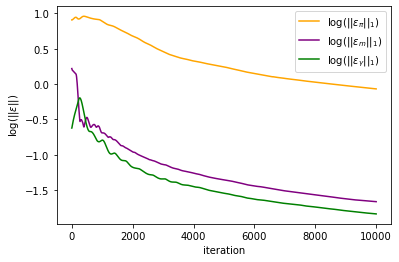

In [121]:
#plt.plot(np.log(mfg_error[:,0])/np.log(10), label = r'$\log(||\varepsilon_u||_1)$', color = 'blue')
plt.plot(np.log(mfg_error[:,1])/np.log(10), label = r'$\log(||\varepsilon_\pi||_1)$', color = 'orange')
plt.plot(np.log(mfg_error[:,2])/np.log(10), label = r'$\log(||\varepsilon_m||_1)$', color = 'purple')
plt.plot(np.log(mfg_error[:,4])/np.log(10), label = r'$\log(||\varepsilon_{\gamma}||_1)$', color = 'green')
#plt.plot(np.log(mfg_error[:,3])/np.log(10), label = r'$\log(||\varepsilon_P||_1)$', color = 'red')
plt.xlabel('iteration')
plt.ylabel(r'$\log(||\varepsilon||)$')
plt.legend()
plt.savefig('chambolle_pock_bregman_constraint_mfg_error.png', dpi=500, bbox_inches='tight')
plt.show()

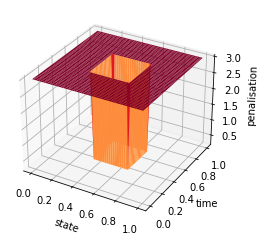

In [122]:
t = np.linspace(0, 1, T)
y = np.linspace(0, 1, n)

X, Y = np.meshgrid(y, t)
Z = eta

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='YlOrRd', edgecolor='none')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('state')
ax.set_ylabel('time')
ax.set_zlabel('penalisation')
plt.show()

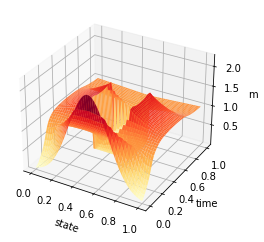

In [123]:
X, Y = np.meshgrid(y, t)
Z = av_m_1

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='YlOrRd')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='YlOrRd', edgecolor='none')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='v£iridis', edgecolor='none')
ax.set_xlabel('state')
ax.set_ylabel('time')
ax.set_zlabel('m')

plt.savefig('chambolle_pock_bregman_constraint_mfg_m.png',dpi=500, bbox_inches='tight')

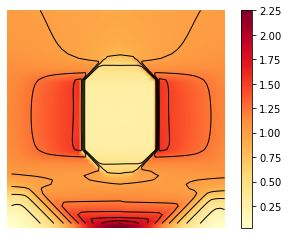

In [124]:
X, Y = np.meshgrid(t, y)
Z = av_m_1

minm = np.min(m_1_bar)
maxm = np.max(m_1_bar)
levels = np.linspace(minm,maxm,10)

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
                cmap='YlOrRd')
plt.axis('off')
CS = ax.contour(Z,levels, origin='lower', colors='black',
                linewidths=1)
CBI = fig.colorbar(im)

plt.savefig('chambolle_pock_bregman_constraint_mfg_m_contour.png', dpi=500, bbox_inches='tight')

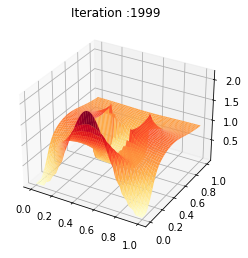

In [125]:
t = np.linspace(0, 1, T)
y = np.linspace(0, 1, n)

Nb_im = 2000
X, Y = np.meshgrid(y, t)
Z = ev_m[:Nb_im]

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plt.title('Iteration :%s'%frame_number)
    plot[0] = ax.plot_surface(X, Y, Z[frame_number,:,:], cmap="YlOrRd",edgecolor='none')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fps = 100
plot = [ax.plot_surface(X, Y, Z[0,:,:], rstride=1, cstride=1)]
ani = animation.FuncAnimation(fig, update_plot, Nb_im, fargs=(Z, plot), interval=2000/fps)

ani.save('chambolle_pock_bregman_constraint_mfg_m_convergence.mp4',writer='ffmpeg',fps=fps)

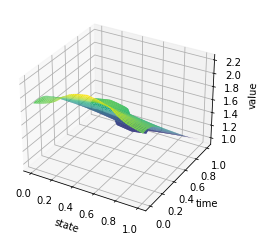

In [126]:
X, Y = np.meshgrid(y, t)
Z = U

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='magma')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('state')
ax.set_ylabel('time')
ax.set_zlabel('value')

plt.savefig('chambolle_pock_bregman_constraint_mfg_u.png',dpi=500, bbox_inches='tight')

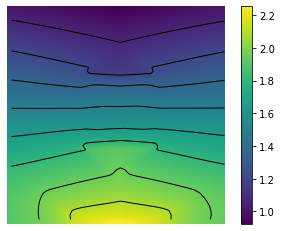

In [127]:
X, Y = np.meshgrid(t, y)
Z = U
minu = np.min(U)
maxu = np.max(U)
levels = np.linspace(minu,maxu,10)

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
                cmap='viridis')

plt.axis('off')
CS = ax.contour(Z,levels, origin='lower', colors='black',
                linewidths=1)
CBI = fig.colorbar(im)

plt.savefig('chambolle_pock_bregman_constraint_mfg_u_contour.png',dpi=500, bbox_inches='tight')

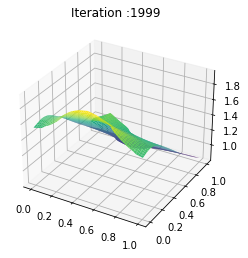

In [128]:
t = np.linspace(0, 1, T)
y = np.linspace(0, 1, n)

Nb_im = 2000
X, Y = np.meshgrid(y, t)
Z = ev_u[:Nb_im]

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plt.title('Iteration :%s'%frame_number)
    plot[0] = ax.plot_surface(X, Y, Z[frame_number,:,:], cmap="viridis",edgecolor='none')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fps = 100
plot = [ax.plot_surface(X, Y, Z[0,:,:], rstride=1, cstride=1)]
ani = animation.FuncAnimation(fig, update_plot, Nb_im, fargs=(Z, plot), interval=2000/fps)

ani.save('chambolle_pock_bregman_constraint_mfg_u_convergence.mp4',writer='ffmpeg',fps=fps)

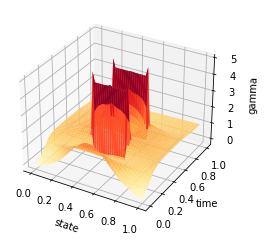

In [129]:
X, Y = np.meshgrid(y, t)

Z = av_gamma

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='YlOrRd', edgecolor='none')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('state')
ax.set_ylabel('time')
ax.set_zlabel('gamma')

plt.savefig('chambolle_pock_bregman_constraint_mfg_gamma.png',dpi=500, bbox_inches='tight')

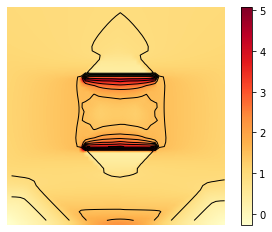

In [130]:
X, Y = np.meshgrid(t, y)
Z = av_gamma

mingamma = np.min(av_gamma)
maxgamma = np.max(av_gamma)
levels = np.linspace(mingamma,maxgamma,10)

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
                cmap='YlOrRd')
plt.axis('off')
CS = ax.contour(Z,levels, origin='lower', colors='black',
                linewidths=1)
CBI = fig.colorbar(im)

plt.savefig('chambolle_pock_bregman_constraint_mfg_gamma_contour.png', dpi=500, bbox_inches='tight')

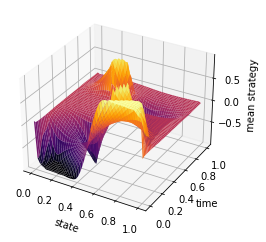

In [131]:
ti = np.linspace(0, 1, T-1)
y = np.linspace(0, 1, n)

X, Y = np.meshgrid(y, ti)
Z = mean_field_strategy(Pi,T,n)

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='magma')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno', edgecolor='none')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('state')
ax.set_ylabel('time')
ax.set_zlabel('mean strategy')

plt.savefig('chambolle_pock_bregman_constraint_mfg_mean_strategy.png', dpi=500, bbox_inches='tight')

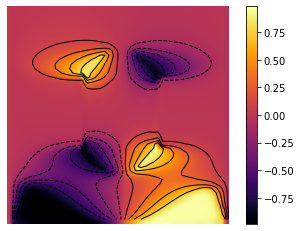

In [132]:
minm = np.min(Z)
maxm = np.max(Z)
levels = np.linspace(minm,maxm,10)

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
                cmap='inferno')
plt.axis('off')
CS = ax.contour(Z,levels, origin='lower', colors='black',
                linewidths=1)
CBI = fig.colorbar(im)

plt.savefig('chambolle_pock_bregman_constraint_mfg_mean_strategy_contour.png', dpi=500, bbox_inches='tight')

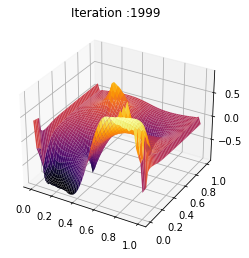

In [133]:
t = np.linspace(0, 1, T-1)
y = np.linspace(0, 1, n)

Nb_im = 2000
X, Y = np.meshgrid(y, t)
Z = ev_m_s[:Nb_im]

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plt.title('Iteration :%s'%frame_number)
    plot[0] = ax.plot_surface(X, Y, Z[frame_number,:,:], cmap="inferno",edgecolor='none')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fps = 100
plot = [ax.plot_surface(X, Y, Z[0,:,:], rstride=1, cstride=1)]
ani = animation.FuncAnimation(fig, update_plot, Nb_im, fargs=(Z, plot), interval=2000/fps)

ani.save('chambolle_pock_bregman_constraint_mfg_mean_strategy_convergence.mp4',writer='ffmpeg',fps=fps)

### MFGC

In [134]:
T = 50
n = 50

alpha = alpha_cost(T,n)


L = norm_A(alpha,n,T)
sigma = 1/L
tau = 1/L
theta = 1
Dmin = -2
Dmax = 0

beta = displacement_cost(T,n)

nu = np.zeros((T,n))
eta = np.zeros((T,n))

D_0 = 1/2
Db = reference_demand(T)*2

m_0 = initial_mass(n)
var_m_1 = np.zeros((T,n)) + 1
var_m_2 = var_m_1
var_w = np.zeros((T-1,n,n)) + 1
var_D = Db

P = np.random.rand(T-1)
u = np.random.rand(T,n)
gamma = np.zeros((T,n))

(m_1_bar,m_2_bar,w_bar,D_bar) = (var_m_1,var_m_2,var_w,var_D)

(av_m_1,av_m_2,av_w,av_D,av_u,av_gamma,av_P) = (m_1_bar,m_2_bar,w_bar,D_bar,u,gamma,P)

print(tau)

0.008112138513416675


In [135]:
N = 10000
mfg_error = np.zeros((N,5))
ev_m_s = np.zeros((N,T-1,n))
ev_m = np.zeros((N,T,n))
ev_u = np.zeros((N,T,n))

start = time.time()
for i in range(N):
    print(round(i/N*100, 2),"              \r",end = '')
    P = prox_P(P,D_bar,w_bar,T,n,sigma,alpha)
    u = prox_u(u,m_1_bar,w_bar,m_0,sigma,T,n)
    gamma = prox_gamma(gamma,m_1_bar,m_2_bar,sigma)
    (m_1,m_2,w,D) = (var_m_1,var_m_2,var_w,var_D)
    var_D = D_prox_quad(D,P,T,n,tau,alpha,Db,D_0,Dmin,Dmax)
    (var_m_1,var_w) = m_1_w_proj(P,gamma,u,m_1,w,T,n,tau,alpha,beta)
    var_m_2 = m_2 + tau*gamma
    (m_1_bar,m_2_bar,w_bar,D_bar) = relax(var_m_1,var_m_2,var_w,var_D,m_1,m_2,w,D,theta)
    
    
    (av_m_1,av_m_2,av_w,av_D,av_u,av_gamma,av_P) = ergodic(var_m_1,var_m_2,var_w,var_D,u,gamma,P,av_m_1,av_m_2,av_w,av_D,av_u,av_gamma,av_P,i)
    (U,Pi) = d_p_mapping(av_m_1,av_w,av_gamma,av_P,alpha,beta,T,n,tol = 1e-4,mfg=0)
    mfg_error[i] = np.array(verification(av_P,U,av_gamma,av_m_1,Pi,av_w,T,n,beta,nu,m_0,alpha,Db,Dmin,Dmax,eta,mfg=0))
    (ev_m_s[i],ev_m[i],ev_u[i]) = (mean_field_strategy(Pi,T,n),av_m_1,U)
    end = time.time()

print("\n execution time :",round(end-start,2), "s")

99.99               
 execution time : 4393.13 s


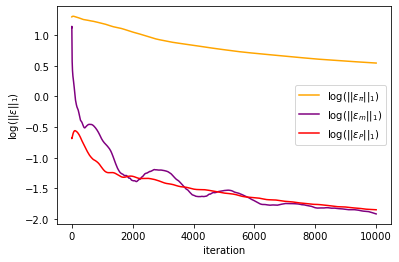

In [136]:
#plt.plot(np.log(mfg_error[:,0])/np.log(10), label = r'$\log(||\varepsilon_u||_1)$', color = 'blue')
plt.plot(np.log(mfg_error[:,1])/np.log(10), label = r'$\log(||\varepsilon_\pi||_1)$', color = 'orange')
plt.plot(np.log(mfg_error[:,2])/np.log(10), label = r'$\log(||\varepsilon_m||_1)$', color = 'purple')
#plt.plot(np.log(mfg_error[:,4])/np.log(10), label = r'$\log(||\varepsilon_{\gamma}||_1)$', color = 'green')
plt.plot(np.log(mfg_error[:,3])/np.log(10), label = r'$\log(||\varepsilon_P||_1)$', color = 'red')
plt.xlabel('iteration')
plt.ylabel(r'$\log(||\varepsilon||_1)$')
plt.legend()
plt.savefig('chambolle_pock_bregman_constraint_mfgc_error.png', dpi=500, bbox_inches='tight')
plt.show()

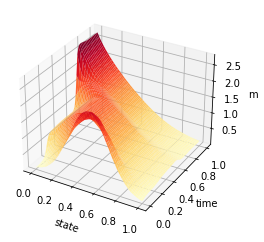

In [137]:
t = np.linspace(0, 1, T)
y = np.linspace(0, 1, n)

X, Y = np.meshgrid(y, t)
Z = av_m_1

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='YlOrRd', edgecolor='none')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='v£iridis', edgecolor='none')
ax.set_xlabel('state')
ax.set_ylabel('time')
ax.set_zlabel('m')

plt.savefig('chambolle_pock_bregman_constraint_mfgc_m.png', dpi=500, bbox_inches='tight')

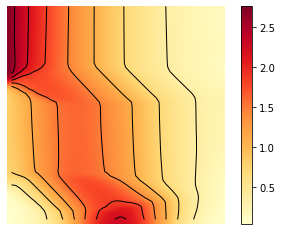

In [138]:
X, Y = np.meshgrid(t, y)
Z = av_m_1

minm = np.min(m_1_bar)
maxm = np.max(m_1_bar)
levels = np.linspace(minm,maxm,10)

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
                cmap='YlOrRd')
plt.axis('off')
CS = ax.contour(Z,levels, origin='lower', colors='black',
                linewidths=1)
CBI = fig.colorbar(im)


plt.savefig('chambolle_pock_bregman_constraint_mfgc_m_contour.png', dpi=500, bbox_inches='tight')

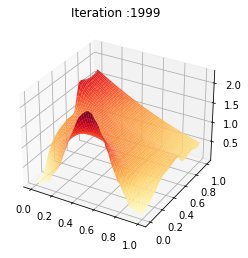

In [139]:
t = np.linspace(0, 1, T)
y = np.linspace(0, 1, n)

Nb_im = 2000
X, Y = np.meshgrid(y, t)
Z = ev_m[:Nb_im]

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plt.title('Iteration :%s'%frame_number)
    plot[0] = ax.plot_surface(X, Y, Z[frame_number,:,:], cmap="YlOrRd",edgecolor='none')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fps = 100
plot = [ax.plot_surface(X, Y, Z[0,:,:], rstride=1, cstride=1)]
ani = animation.FuncAnimation(fig, update_plot, Nb_im, fargs=(Z, plot), interval=2000/fps)

ani.save('chambolle_pock_bregman_constraint_mfgc_m_convergence.mp4',writer='ffmpeg',fps=fps)

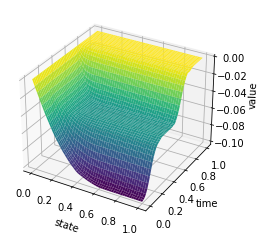

In [140]:
X, Y = np.meshgrid(y, t)
Z = U

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='magma')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('state')
ax.set_ylabel('time')
ax.set_zlabel('value')

plt.savefig('chambolle_pock_bregman_constraint_mfgc_u.png', dpi=500, bbox_inches='tight')

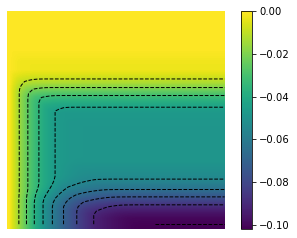

In [141]:
X, Y = np.meshgrid(t, y)
Z = U
minu = np.min(U)
maxu = np.max(U)
levels = np.linspace(minu,maxu,10)

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
                cmap='viridis')

plt.axis('off')
CS = ax.contour(Z,levels, origin='lower', colors='black',
                linewidths=1)
CBI = fig.colorbar(im)

plt.savefig('chambolle_pock_bregman_constraint_mfgc_u_contour.png',dpi=500, bbox_inches='tight')

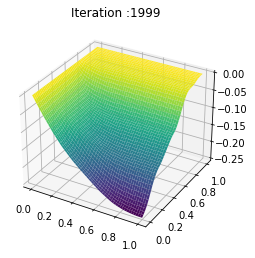

In [142]:
t = np.linspace(0, 1, T)
y = np.linspace(0, 1, n)

Nb_im = 2000
X, Y = np.meshgrid(y, t)
Z = ev_u[:Nb_im]

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plt.title('Iteration :%s'%frame_number)
    plot[0] = ax.plot_surface(X, Y, Z[frame_number,:,:], cmap="viridis",edgecolor='none')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fps = 100
plot = [ax.plot_surface(X, Y, Z[0,:,:], rstride=1, cstride=1)]
ani = animation.FuncAnimation(fig, update_plot, Nb_im, fargs=(Z, plot), interval=2000/fps)

ani.save('chambolle_pock_bregman_constraint_mfgc_u_convergence.mp4',writer='ffmpeg',fps=fps)

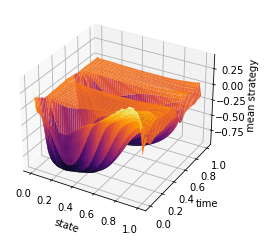

In [143]:
ti = np.linspace(0, 1, T-1)
y = np.linspace(0, 1, n)

X, Y = np.meshgrid(y, ti)
Z = mean_field_strategy(Pi,T,n)

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='magma')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno', edgecolor='none')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('state')
ax.set_ylabel('time')
ax.set_zlabel('mean strategy')

plt.savefig('chambolle_pock_bregman_constraint_mfgc_mean_strategy.png', dpi=500, bbox_inches='tight')

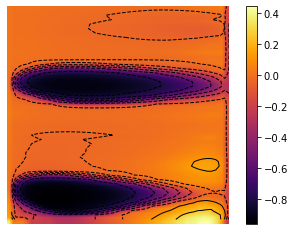

In [144]:
minm = np.min(Z)
maxm = np.max(Z)
levels = np.linspace(minm,maxm,10)

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
                cmap='inferno')
plt.axis('off')
CS = ax.contour(Z,levels, origin='lower', colors='black',
                linewidths=1)
CBI = fig.colorbar(im)

plt.savefig('chambolle_pock_bregman_constraint_mfgc_mean_strategy_contour.png', dpi=500, bbox_inches='tight')

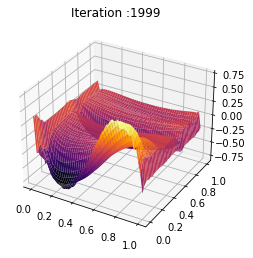

In [145]:
t = np.linspace(0, 1, T-1)
y = np.linspace(0, 1, n)

Nb_im = 2000
X, Y = np.meshgrid(y, t)
Z = ev_m_s[:Nb_im]

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plt.title('Iteration :%s'%frame_number)
    plot[0] = ax.plot_surface(X, Y, Z[frame_number,:,:], cmap="inferno",edgecolor='none')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fps = 100
plot = [ax.plot_surface(X, Y, Z[0,:,:], rstride=1, cstride=1)]
ani = animation.FuncAnimation(fig, update_plot, Nb_im, fargs=(Z, plot), interval=2000/fps)

ani.save('chambolle_pock_bregman_constraint_mfgc_mean_strategy_convergence.mp4',writer='ffmpeg',fps=fps)

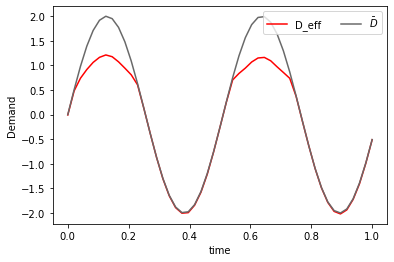

In [146]:
def real_demand(Db,D_0,alpha,w,T,n):
    dx = 1/n
    D_eff = np.zeros(T-1)
    for t in range(T-1):
        D_eff[t] = (np.sum(alpha[t]*w[t])*dx + Db[t])
    return(D_eff)

plt.plot(np.linspace(0,1,T-1),real_demand(Db,D_0,alpha,av_w,T,n), 'r-',label='D_eff')
plt.plot(np.linspace(0,1,T-1),Db,'dimgrey', label = r'$\bar{D}$')
plt.legend(loc='upper right',
           ncol=2)
plt.xlabel('time')
plt.ylabel('Demand')

plt.savefig('chambolle_pock_bregman_constraint_mfgc_D.png', dpi=500, bbox_inches='tight')

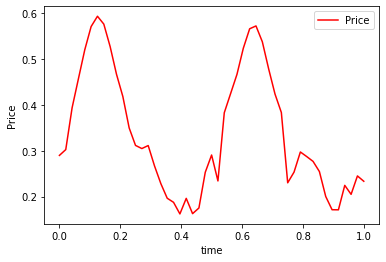

In [147]:
plt.plot(np.linspace(0,1,T-1),av_P, 'r-',label='Price')
plt.legend(loc='upper right',
           ncol=2)
plt.xlabel('time')
plt.ylabel('Price')

plt.savefig('chambolle_pock_bregman_constraint_mfgc_P.png', dpi=500, bbox_inches='tight')

```{bibliography} biblio.bib
:filter: docname in docnames
:style: alpha
```